<a href="https://colab.research.google.com/github/javohiryoldashovBigData/Training_project_for_ML_Regression/blob/main/ML_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
URL = 'https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv'
df = pd.read_csv(URL, index_col = 0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


In [ ]:
housing = df[df.district == 'Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [ ]:
y = housing['price']
y

2       37000.0
3       49500.0
4       55000.0
5       25500.0
6       21200.0
         ...   
7404    48000.0
7422    18500.0
7433    28000.0
7445    49800.0
7464    22914.0
Name: price, Length: 1616, dtype: float64

In [ ]:
x = housing['size']
x

2       42.0
3       65.0
4       70.0
5       28.0
6       30.0
        ... 
7404    70.0
7422    20.0
7433    32.0
7445    70.0
7464    30.0
Name: size, Length: 1616, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

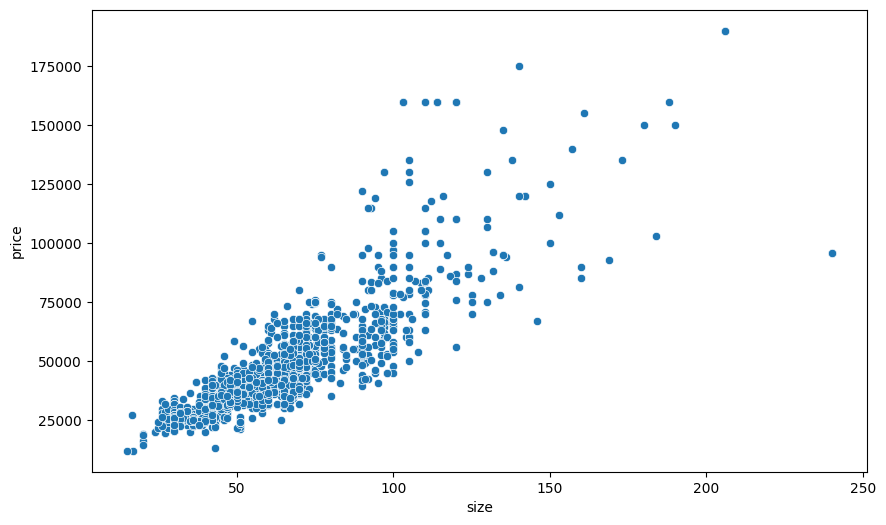

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = housing, x = 'size', y = 'price')
plt.show()

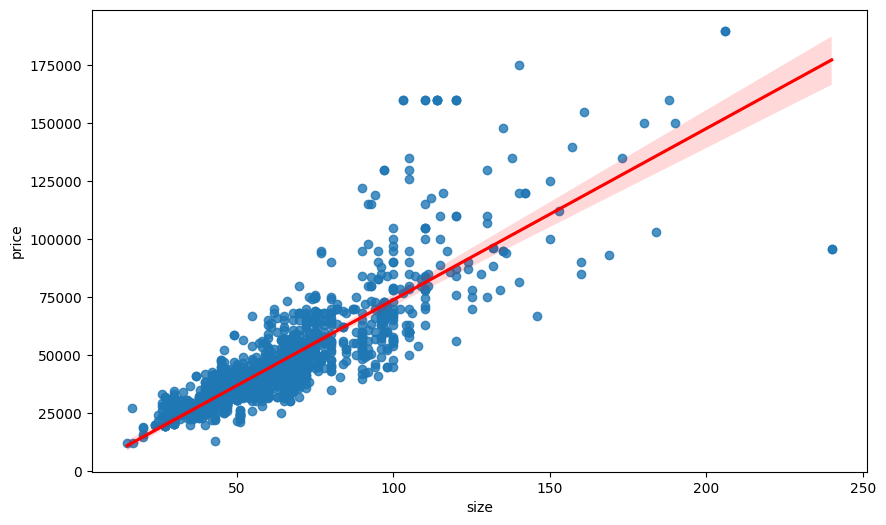

In [ ]:
plt.figure(figsize = (10,6))
sns.regplot(data = housing, x = 'size', y = 'price', line_kws = {'color' : 'red'})
plt.show()

In [ ]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [ ]:
theta1 = sum((x-x_mean)*(y-y_mean))/sum((x-x_mean)**2)
theta1

740.0264822713287

In [ ]:
theta0 = y_mean - theta1*x_mean
theta0

-195.94911352690542

In [ ]:
x_test = housing.sample(10, random_state = 42)['size'].to_numpy()
print(f"{x_test=}")
y_test = housing.sample(10, random_state = 42)['price'].to_numpy()
print(f"{y_test=}")

x_test=array([54., 42., 36., 60., 48., 68., 38., 65., 52., 44.])
y_test=array([37500., 26500., 25500., 39000., 32500., 34500., 22700., 47000.,
       37900., 36000.])


In [ ]:
y_predict = theta0 + theta1 * x_test
print(f"{y_predict=}")

y_predict=array([39765.48092912, 30885.16314187, 26445.00424824, 44205.63982275,
       35325.3220355 , 50125.85168092, 27925.05721278, 47905.77223411,
       38285.42796458, 32365.21610641])


In [ ]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_test2 = np.asanyarray(housing[['size']])
y_test2 = np.asanyarray(housing[['price']])

In [ ]:
LR_model.fit(x_test2, y_test2)

LinearRegression()

In [ ]:
theta11 = LR_model.coef_[0][0]
theta00 = LR_model.intercept_[0]
print(f"{theta11 = }")
print(f"{theta00 = }")

theta11 = 740.026482271325
theta00 = -195.9491135266726


Text(0, 0.5, 'Price')

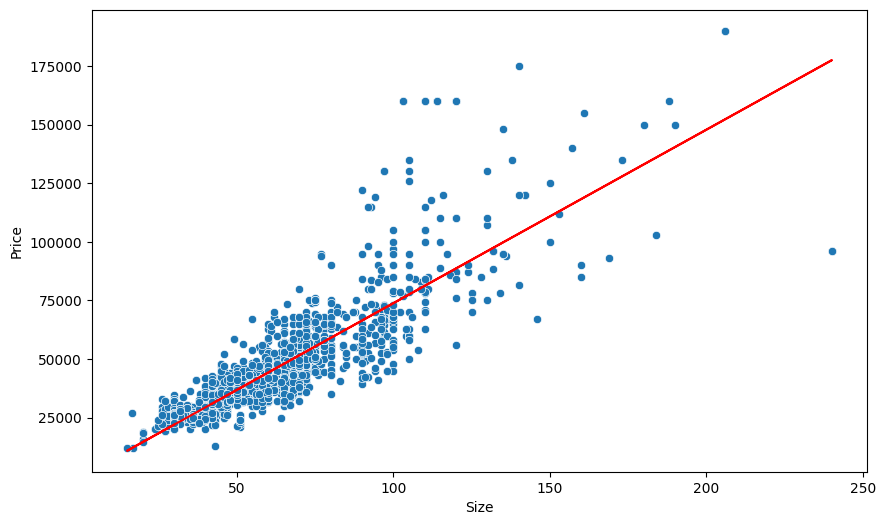

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = housing, x = 'size', y = 'price')
plt.plot(x_test2,theta11*x_test2 + theta00, '-r')
plt.xlabel('Size')
plt.ylabel('Price')

In [ ]:
y_predict = LR_model.predict(x_test2)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test2, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test2, y_predict))
print(f"{MAE = }")
print(f"{RMSE = }")

MAE = 7393.754003106556
RMSE = 12198.477784633837
